<a href="https://colab.research.google.com/github/LearnByDoing2024/Youtube/blob/main/20241022_youtube_algorithm_simple_test/Copy_of_youtube_attention_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

youtube attention test

Data preparation:

Copy paste first two rows of youtube front page video titles

Or, screen shot the first two rows of youtube front page video list

Then let chatgpt to organize the data frame

In [ ]:
#@title import gpt transformed data
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Upload the CSV file
from google.colab import files
uploaded = files.upload()

# Read the CSV file into a DataFrame
import io
df = pd.read_csv(io.BytesIO(uploaded['Updated_Video_Category_Counts.csv']))

# Display the first few rows of the DataFrame
df.head()


Saving Updated_Video_Category_Counts.csv to Updated_Video_Category_Counts.csv


,Category,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8,Round 9,...,Round 14,Round 15,Round 16,Round 17,Round 18,Round 19,Round 21,Round 22,Round 23,Round 24
0,AI/Automation,5,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AI/Industry,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AI/Technology,0,3,3,2,3,2,1,3,3,...,0,0,0,0,0,0,0,1,1,2
3,Business/Entrepreneurship,4,5,2,2,1,2,4,2,3,...,0,0,0,0,0,0,0,1,0,0
4,Content Creation,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#@title merging
import re
import pandas as pd

# Set 'Category' as the index
df_cleaned = df.set_index('Category')

# Drop the 'Total' row if it exists
if 'Total' in df_cleaned.index:
    df_cleaned = df_cleaned.drop(index=['Total'])

# Group by 'Category' and sum the rows (this merges rows with the same category)
df_cleaned = df_cleaned.groupby('Category').sum()

# Convert all columns to numeric, coercing errors (turns non-numeric into NaN)
df_cleaned = df_cleaned.apply(pd.to_numeric, errors='coerce')

# Fill NaN values with 0
df_cleaned.fillna(0, inplace=True)

# Define a function to extract the round number from the column name
def extract_round_num(col_name):
    match = re.search(r'Round (\d+)', col_name)
    if match:
        return int(match.group(1))
    return float('inf')  # If the column doesn't match "Round X", place it at the end

# Sort the columns based on the extracted round number
df_cleaned = df_cleaned[sorted(df_cleaned.columns, key=extract_round_num)]

# Calculate the cumulative sum across rounds
cumulative_df = df_cleaned.cumsum(axis=1)

# Calculate percentage cumulative trend by dividing by the total sum for each round (column-wise)
percentage_cumulative_df = cumulative_df.div(cumulative_df.sum(axis=0), axis=1) * 100

# Display the percentage cumulative DataFrame
percentage_cumulative_df.head()


,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8,Round 9,Round 10,...,Round 14,Round 15,Round 16,Round 17,Round 18,Round 19,Round 21,Round 22,Round 23,Round 24
Category,,,,,,,,,,,,,,,,,,,,,
AI/Automation,38.461538,20.0,14.285714,13.333333,10.909091,10.769231,10.666667,9.411765,8.421053,7.619048,...,5.925926,5.517241,5.161290,4.848485,4.571429,4.324324,4.102564,3.791469,3.619910,3.448276
AI/Education,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.862069
AI/Industry,0.000000,4.0,2.857143,2.222222,3.636364,4.615385,4.000000,3.529412,3.157895,2.857143,...,2.222222,2.068966,1.935484,1.818182,1.714286,1.621622,1.538462,1.421801,1.357466,1.293103
AI/Technology,0.000000,12.0,17.142857,17.777778,20.000000,20.000000,18.666667,20.000000,21.052632,22.857143,...,25.925926,24.827586,23.870968,24.848485,24.000000,23.783784,23.589744,22.748815,22.624434,23.275862
Business/Entrepreneurship,30.769231,36.0,31.428571,28.888889,25.454545,24.615385,26.666667,25.882353,26.315789,27.619048,...,26.666667,26.896552,27.096774,26.666667,26.285714,24.864865,24.615385,23.696682,22.624434,21.551724


<Figure size 1200x600 with 0 Axes>

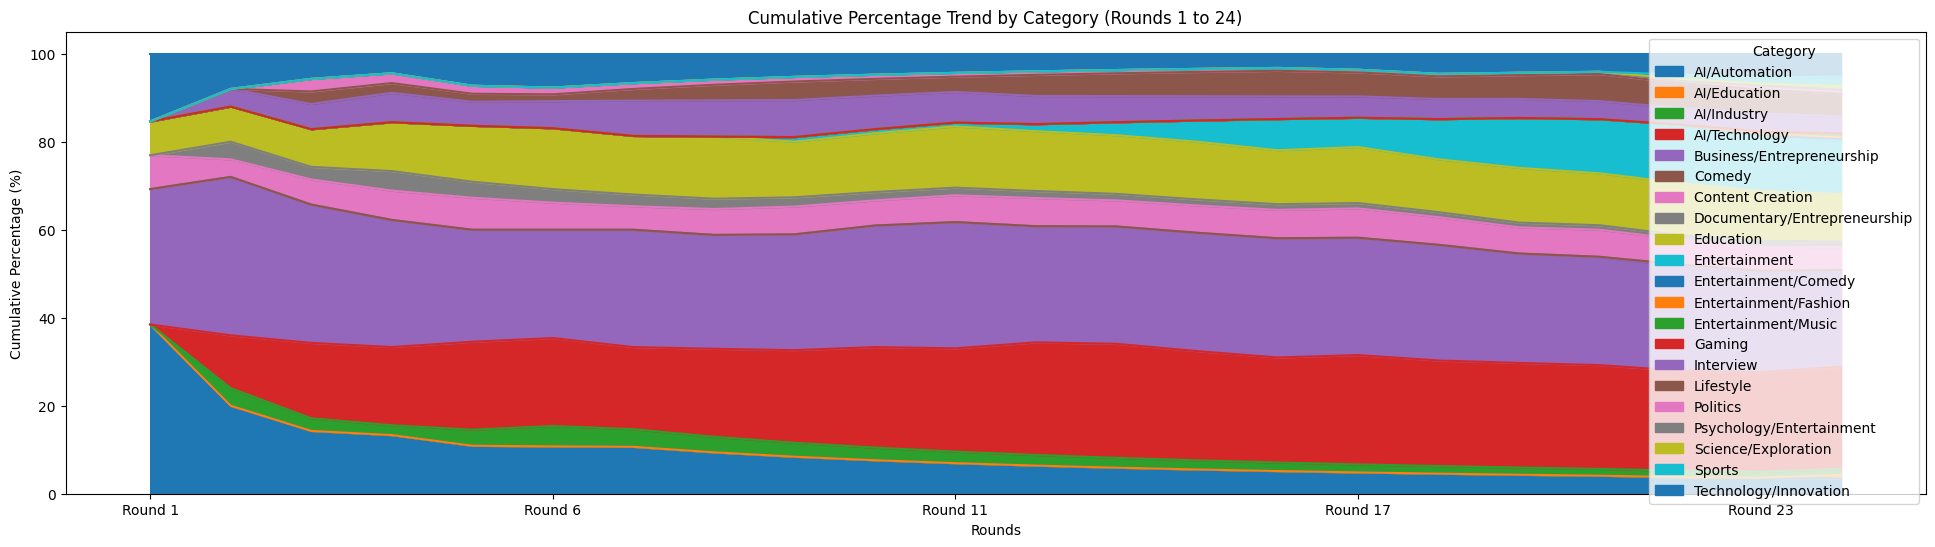

In [ ]:
#@title matplotlib
# Plotting the cumulative percentage area chart
plt.figure(figsize=(12, 6))
percentage_cumulative_df.T.plot(kind='area', stacked=True, figsize=(24, 6))

# Set plot labels and title
plt.title('Cumulative Percentage Trend by Category (Rounds 1 to 24)')
plt.ylabel('Cumulative Percentage (%)')
plt.xlabel('Rounds')

# Display the chart
plt.show()


In [ ]:
#@title plotly
import plotly.graph_objects as go

# Transpose the DataFrame so that rounds are on the x-axis
percentage_cumulative_df_T = percentage_cumulative_df.T

# Create a stacked area plot using Plotly
fig = go.Figure()

# Loop over each category (columns) in the transposed DataFrame
for category in percentage_cumulative_df_T.columns:
    fig.add_trace(go.Scatter(
        x=percentage_cumulative_df_T.index,
        y=percentage_cumulative_df_T[category],
        mode='lines',
        name=category,
        stackgroup='one'  # Defines that this is part of a stacked area chart
    ))

# Set the layout for the plot
fig.update_layout(
    title='Cumulative Percentage Trend by Category (Rounds 1 to 24)',
    xaxis_title='Rounds',
    yaxis_title='Cumulative Percentage (%)',
    showlegend=True,
    height=600,
    width=1200
)

# Display the chart
fig.show()
